C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/3644481360.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c', LineWidth=1.5, label='Noisy')
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/3644481360.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')


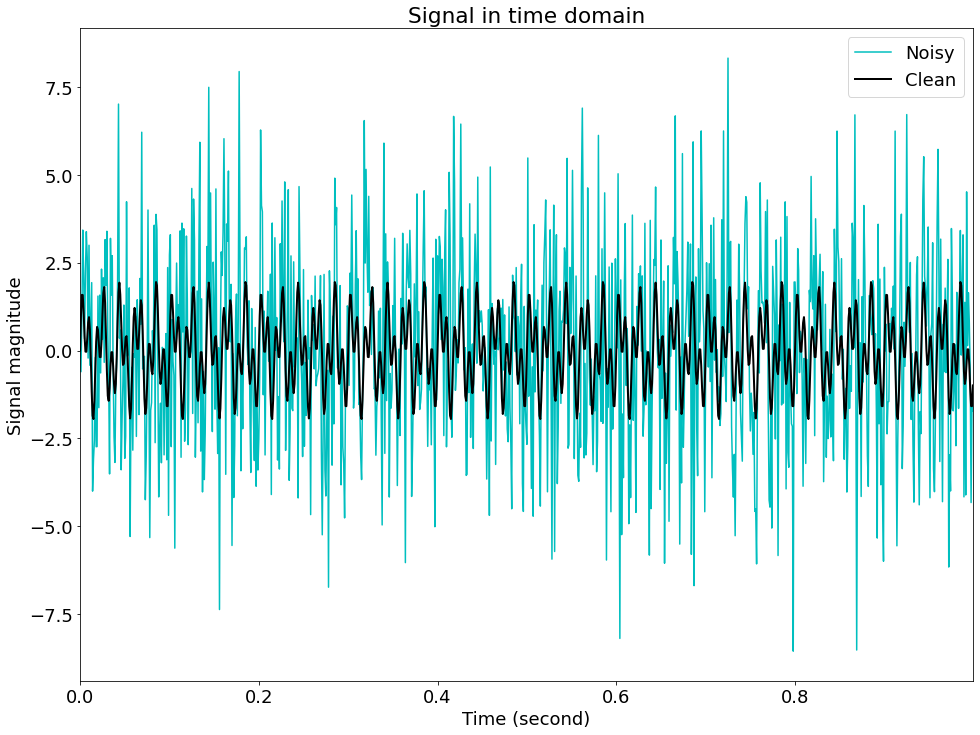

In [97]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[16,12]
plt.rcParams.update({'font.size':18})

##Creating a simple signal with two sine wave frequencies and a signal mixed with random noises
dt = 0.001 ##Interval between two consecutive sampling points is 0.001 second
t=np.arange(0,1,dt) ##An array of 1 second with size equal to 1/0.001
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t) ##A combination of 2 sine waves with frequencies 50 Hertz and 120 Hertz
f_clean= f
f = f + 2.5*np.random.randn(len(t)) ## The two sine waves mixed with random noises with magnitude from -2.5 to 2.5
plt.plot(t,f,color='c', LineWidth=1.5, label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.title("Signal in time domain ")
plt.xlim(t[0],t[-1])
plt.xlabel("Time (second)")
plt.ylabel("Signal magnitude")
plt.legend()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/2981512330.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/2981512330.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/2981512330.py:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L], color='c', LineWidth =2, label = 'Noisy')
C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ASUS\Ap

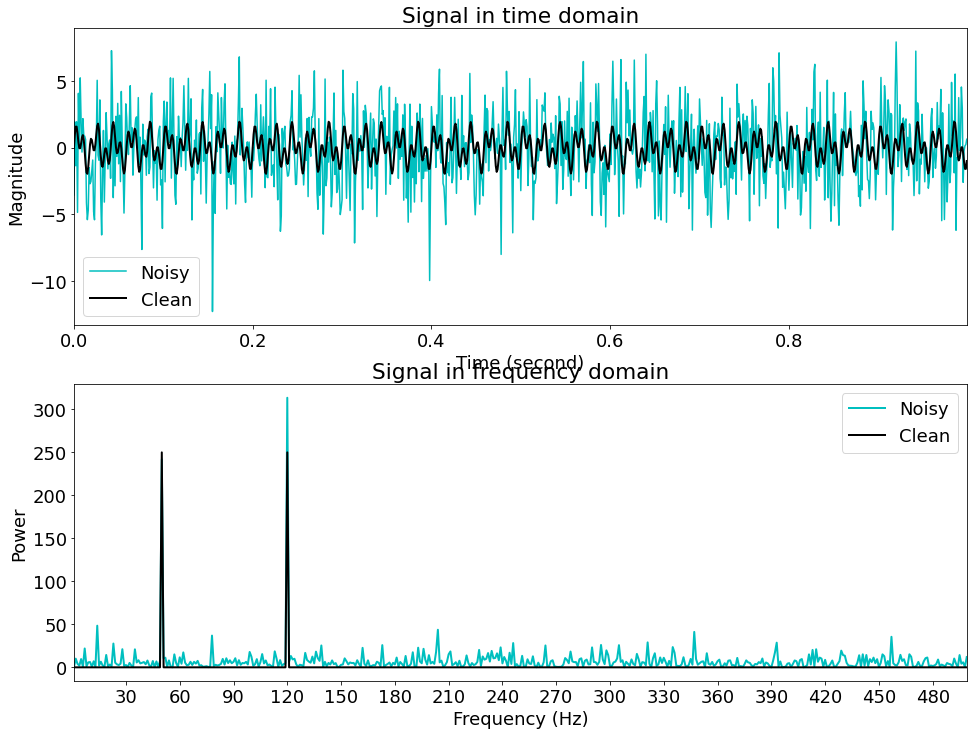

In [76]:
## Transforming time domain of signal into frequency domain
n=len(f) # n is the number of sampling points
fhat = np.fft.fft(f,n) # Applying Fast Fourier Transform to the signal with random noise
fhat_clean = np.fft.fft(f_clean,n) # Fast Fourier Transform to clean signal
PSDclean= fhat_clean*np.conj(fhat_clean)/n # Calculating the power of the clean signal
PSD = fhat*np.conj(fhat)/n # Calculating the power of the signal with noises
freq=(1/(dt*n))*np.arange(n) # Frequency of the output signals
L= np.arange(1,np.floor(n/2),dtype='int')# Half of the range
fig,axs = plt.subplots(2,1) 

##Plotting the signals in time domain
plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlabel("Time (second)")
plt.ylabel("Magnitude")
plt.title("Signal in time domain")
plt.xlim(t[0],t[-1])
plt.legend()

##Plotting the signals in frequency domain
plt.sca(axs[1])
plt.plot(freq[L],PSD[L], color='c', LineWidth =2, label = 'Noisy')
plt.plot(freq[L],PSDclean[L],color='k', LineWidth = 2, label = 'Clean') 
plt.title("Signal in frequency domain") 
plt.xlabel("Frequency (Hz)")
plt.xticks(np.arange(freq[0], freq[L[-1]], step=30))
plt.ylabel("Power")
plt.xlim(L[0],L[-1])
plt.legend()
plt.show()

In [95]:
## Filtering noises from signal
PSD=PSD.real # Taking the real part of PSD
for i in range(len(PSD)):
    if PSD[i] <100: # for each component in frequency domain, if its power is higher than 100, set it to zero
        PSD[i] =0
        fhat[i]=(0+0j)



ffilt = np.fft.ifft(fhat) #Applying inverse of Fast Fourier Transform to convert frequency domain to time domain

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/3396487902.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ffilt,color='c', LineWidth = 2, label = 'Filtered signal')
C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


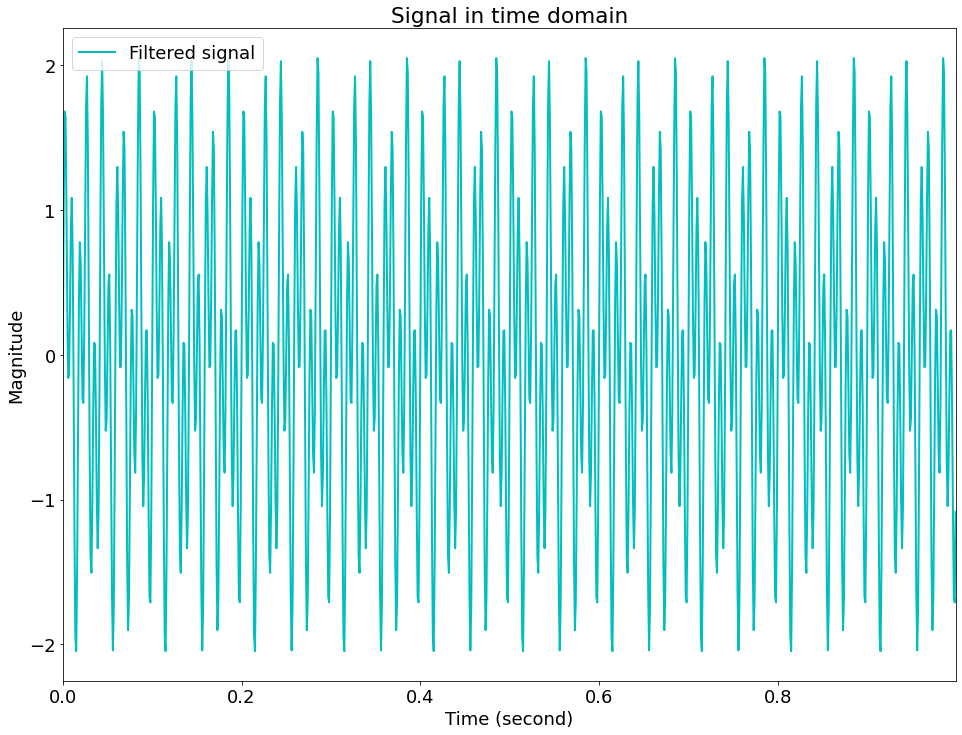

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13444/3396487902.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k', LineWidth = 2, label = 'Clean signal')


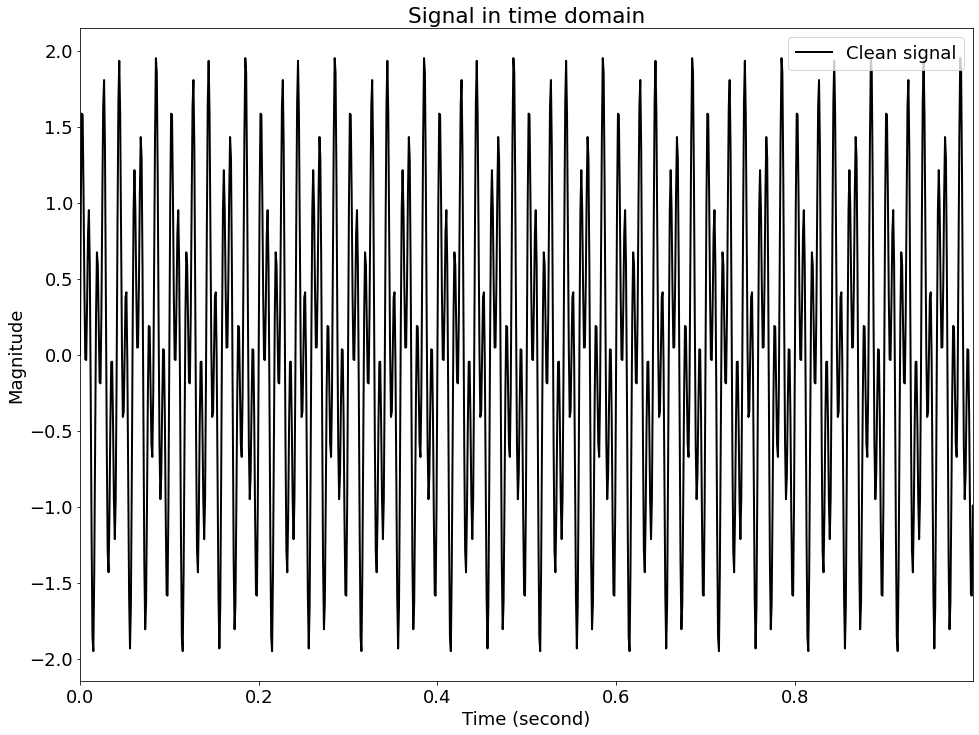

In [96]:
## Plotting the filtered signal in time domain
plt.plot(t,ffilt,color='c', LineWidth = 2, label = 'Filtered signal')
plt.xlim(t[0],t[-1])
plt.title("Signal in time domain") 
plt.xlabel("Time (second)")
plt.xticks(np.arange(t[0], t[-1], step=0.2))
plt.ylabel("Magnitude")
plt.legend()
plt.show()
plt.plot(t,f_clean,color='k', LineWidth = 2, label = 'Clean signal')
plt.xlim(t[0],t[-1])
plt.title("Signal in time domain") 
plt.xlabel("Time (second)")
plt.xticks(np.arange(t[0], t[-1], step=0.2))
plt.ylabel("Magnitude")
plt.legend()
plt.show()